## ライブラリのインポート

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from numpy.random import seed

## データの読み込み

In [2]:
parent_dir = "./titanic"
titanic_train = pd.read_csv(os.path.join(parent_dir, "train.csv"))
titanic_test = pd.read_csv(os.path.join(parent_dir, "test.csv"))

In [3]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
# データを数値形式に置き換え
titanic_train["isMale"] = titanic_train["Sex"].map({"male": 1, "female": 0})
titanic_test["isMale"] = titanic_test["Sex"].map({"male": 1, "female": 0})

cols = ["Pclass", "isMale", "Age", "SibSp", "Parch", "Fare"]

train_X = titanic_train[cols]
train_Y = titanic_train["Survived"]

test_X = titanic_test[cols]

## 欠損値の補完

In [6]:
train_X.isnull().any(axis=0)

Pclass    False
isMale    False
Age        True
SibSp     False
Parch     False
Fare      False
dtype: bool

In [7]:
for c in train_X.columns[train_X.isnull().any(axis=0)]:
    train_X[c] = train_X[c].fillna(train_X[c].mean())

In [8]:
test_X.isnull().any(axis=0)

Pclass    False
isMale    False
Age        True
SibSp     False
Parch     False
Fare       True
dtype: bool

In [9]:
for c in test_X.columns[test_X.isnull().any(axis=0)]:
    test_X[c] = test_X[c].fillna(test_X[c].mean())

## データの再確認

In [10]:
train_X.head(3)

,Pclass,isMale,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250


In [11]:
train_Y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [12]:
test_X.head(3)

,Pclass,isMale,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875


## ニューラルネットワークを用いた学習

In [13]:
scaler = StandardScaler()
for c in train_X.columns:
    train_X[c] = train_X[c].astype('float64')
    train_X[c] = scaler.fit_transform(train_X[c].values.reshape(-1,1))

for c in test_X.columns:
    test_X[c] = test_X[c].astype('float64')
    test_X[c] = scaler.fit_transform(test_X[c].values.reshape(-1,1))

In [14]:
def create_model():
    model = Sequential()

    model.add(Dense(len(train_X.columns), input_dim=train_X.shape[1], activation='relu'))

    model.add(Dense(16384, activation='relu'))

    # output
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

In [15]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 16384)             114688    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16385     
Total params: 131,115
Trainable params: 131,115
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(train_X, train_Y, epochs=100, batch_size=10, validation_split=0.2, verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

Epoch 1/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7416 - val_loss: 0.4757 - val_accuracy: 0.8101
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7795 - val_loss: 0.4667 - val_accuracy: 0.8045
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7683 - val_loss: 0.4626 - val_accuracy: 0.7989
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7781 - val_loss: 0.4455 - val_accuracy: 0.8268
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7865 - val_loss: 0.4497 - val_accuracy: 0.7877
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7963 - val_loss: 0.4236 - val_accuracy: 0.8324
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7949 - val_loss: 0.4259 - val_accuracy: 0.8268
Epoch 8/100
7

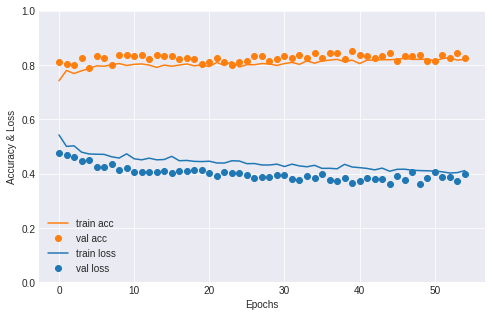

In [17]:
import seaborn as sns

plt.style.use('seaborn-dark')
plt.figure(figsize=(8,5))

epoch = history.epoch
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.plot(epoch, train_acc, label="train acc", c="#ff7f0e")
plt.plot(epoch, val_acc, marker="o", lw=0, label="val acc", c="#ff7f0e")

plt.plot(epoch, train_loss, label="train loss", c="#1f77b4")
plt.plot(epoch, val_loss, marker="o", lw=0, label="val loss", c="#1f77b4")

plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.xlabel("Epochs")
plt.ylabel("Accuracy & Loss")
plt.show()

## 生存予測と提出ファイル出力

In [18]:
p = pd.DataFrame(model.predict(test_X), columns=["Survived"])
p["Survived"] = p["Survived"].apply(lambda x: round(x,0)).astype('int')
p

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [19]:
df_out = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": p["Survived"]})
df_out["PassengerId"] = df_out["PassengerId"].astype('int')
df_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [20]:
df_out.to_csv("submission.csv", index=False)